<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Plot GFP intensity profiles across medial-lateral axis of fixed tissue images and live imaging movies.

In [1]:
import numpy as np
# from scipy import stats
# from scipy import optimize
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import pandas as pd
import os
import seaborn as sns
cwd = os.getcwd(); print("Working dir: " + cwd)


Working dir: /Users/yitengdang/Documents/Projects/Tabler_skull/Scripts/Scripts_image_analysis


In [2]:
# Make plots interactive
# %matplotlib notebook

# Make plots static 
%matplotlib inline

# Fixed tissue images

In [33]:
## Load CTRL data
folder = "/Users/yitengdang/Documents/Projects/Tabler_skull/Data_skull_expansion/series2_SD4/cropped_fronts_OsxGFP_SD4/CTRL/"
# get a list of files
import glob
files = glob.glob( os.path.join(folder, "*.csv") )
print(files)

file_ids = [files[i].split('OsxCreGFP_DAPI_')[1].split('.csv')[0] for i in range(len(files))]

loaded_data_ctrl = [None for i in range(len(files))]

pix_per_micron = 2.5546
old_scale_all = [None for i in range(len(files))] # the wrong scale in microns

for i, file in enumerate(files):
    df_in = pd.read_csv(file)
    df_in.rename(columns={df_in.columns[0]: 'Distance_(microns)'}, inplace=True)
    
    # old scale
    old_scale_all[i] = df_in.iloc[1]['Distance_(microns)']

    # redo normalisation
    df_in['Distance_(microns)'] = np.round(df_in['Distance_(microns)']/old_scale_all[i])
    df_in['Distance_(microns)'] = df_in['Distance_(microns)']/pix_per_micron
    loaded_data_ctrl[i] = df_in

loaded_data = loaded_data_ctrl.copy()

['/Users/yitengdang/Documents/Projects/Tabler_skull/Data_skull_expansion/series2_SD4/cropped_fronts_OsxGFP_SD4/CTRL/MAX_Stitched_2022_06_14_e13,75_Ctl_OsxCreGFP_DAPI_#6left_very_thin_profile.csv', '/Users/yitengdang/Documents/Projects/Tabler_skull/Data_skull_expansion/series2_SD4/cropped_fronts_OsxGFP_SD4/CTRL/MAX_stitched_2022_06_14_e13,75_Ctl_OsxCreGFP_DAPI_#3right_ds2_noIP_profile.csv', '/Users/yitengdang/Documents/Projects/Tabler_skull/Data_skull_expansion/series2_SD4/cropped_fronts_OsxGFP_SD4/CTRL/MAX_stitched_2022_06_14_e13,75_Ctl_OsxCreGFP_DAPI_#2right_no_IP_slice_profile.csv', '/Users/yitengdang/Documents/Projects/Tabler_skull/Data_skull_expansion/series2_SD4/cropped_fronts_OsxGFP_SD4/CTRL/MAX_Stitched_2022_06_14_e13,75_Ctl_OsxCreGFP_DAPI_#1right_crop2_plot_profile.csv', '/Users/yitengdang/Documents/Projects/Tabler_skull/Data_skull_expansion/series2_SD4/cropped_fronts_OsxGFP_SD4/CTRL/MAX_Stitched_2022_06_14_e13,75_Ctl_OsxCreGFP_DAPI_#1right_crop1_plot_profile.csv', '/Users/yite

In [34]:
## Smallest distance of data file
# for i in range(len(loaded_data)):
#     print( loaded_data[i].iloc[1]['Distance_(microns)'] )

In [35]:
## Load BAPN data
folder = "/Users/yitengdang/Documents/Projects/Tabler_skull/Data_skull_expansion/series2_SD4/cropped_fronts_OsxGFP_SD4/BAPN/"
# get a list of files
import glob
files_bapn = glob.glob( os.path.join(folder, "*.csv") )
print(files_bapn)

file_ids_bapn = [files_bapn[i].split('OsxCreGFP_DAPI_')[1].split('.csv')[0] for i in range(len(files_bapn))]

loaded_data_bapn = [None for i in range(len(files_bapn))]
pix_per_micron = 2.53

for i, file in enumerate(files_bapn):
    df_in = pd.read_csv(file);
    df_in['Distance_(pixels)'] = df_in['Distance_(pixels)']/2.53
    df_in.rename(columns={'Distance_(pixels)': 'Distance_(microns)'}, inplace=True)
    loaded_data_bapn[i] = df_in
    
# loaded_data_bapn[8]['Gray_Value']=loaded_data_bapn[8]['Gray_Value']*256 # convert intensity vaules

# loaded_data_bapn    

['/Users/yitengdang/Documents/Projects/Tabler_skull/Data_skull_expansion/series2_SD4/cropped_fronts_OsxGFP_SD4/BAPN/MAX_Stitched_2022_03_07_BAPN_OsxCreGFP_DAPI_30x_20220303_#6_right.csv', '/Users/yitengdang/Documents/Projects/Tabler_skull/Data_skull_expansion/series2_SD4/cropped_fronts_OsxGFP_SD4/BAPN/MAX_Stitched_2022_03_03_BAPN_OsxCreGFP_DAPI_30x_20220303_#1right.csv', '/Users/yitengdang/Documents/Projects/Tabler_skull/Data_skull_expansion/series2_SD4/cropped_fronts_OsxGFP_SD4/BAPN/MAX_Stitched_2022_03_03_BAPN_OsxCreGFP_DAPI_30x_20220303_#5_right.csv', '/Users/yitengdang/Documents/Projects/Tabler_skull/Data_skull_expansion/series2_SD4/cropped_fronts_OsxGFP_SD4/BAPN/MAX_Stitched_2022_03_07_BAPN_OsxCreGFP_DAPI_30x_20220111_#8_cut_right.csv', '/Users/yitengdang/Documents/Projects/Tabler_skull/Data_skull_expansion/series2_SD4/cropped_fronts_OsxGFP_SD4/BAPN/MAX_Stitched_2022_03_07_BAPN_OsxCreGFP_DAPI_30x_20220111_#8_cut_left.csv', '/Users/yitengdang/Documents/Projects/Tabler_skull/Data_sk

In [36]:
# fig, ax = plt.subplots(dpi=100);
# for i, plot_data in enumerate(loaded_data):
#     #print(i)
#     #sns.lineplot(data=plot_data, x="Distance_(µm)", y="Gray_Value", ax=ax)
#     sns.lineplot(data=plot_data, x=plot_data.columns[0], y=y_var, ax=ax, label=i)
# plt.legend()
# plt.show()

# fig, ax = plt.subplots(dpi=100);
# for i, plot_data in enumerate(loaded_data_bapn):
#     #print(i)
#     #sns.lineplot(data=plot_data, x="Distance_(µm)", y="Gray_Value", ax=ax)
#     sns.lineplot(data=plot_data, x=plot_data.columns[0], y=y_var, ax=ax, label=i)

# plt.legend()
# plt.show()

In [37]:
# i=0
# plot_data = loaded_data_bapn[i]
# sns.lineplot(data=plot_data, x=plot_data.columns[0], y=plot_data.columns[1])

## Plot unaligned data

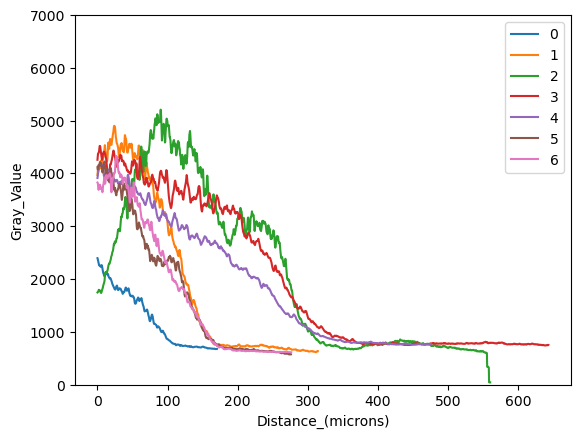

In [38]:
## CTRL
fig, ax = plt.subplots(dpi=100);
for i, plot_data in enumerate(loaded_data):
    #print(i)
    sns.lineplot(data=plot_data, x="Distance_(microns)", y="Gray_Value", ax=ax, label=i)
    #sns.lineplot(data=plot_data, x="Distance2", y=plot_data.columns[1], ax=ax, label=i)
#plt.xlim([-600, 400])
plt.ylim([0, 7000])
plt.legend()   
plt.show()

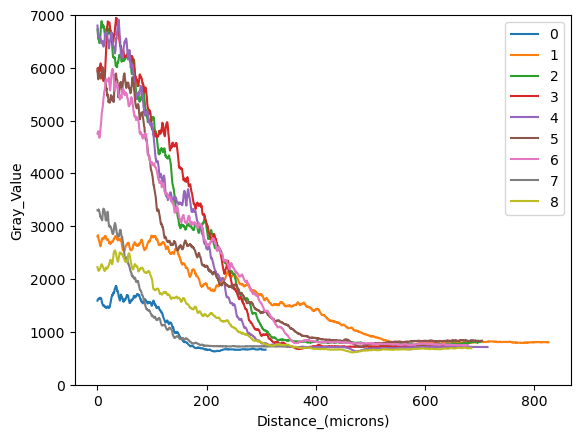

In [39]:
## BAPN
fig, ax = plt.subplots(dpi=100);
for i, plot_data in enumerate(loaded_data_bapn):
    #print(i)
    sns.lineplot(data=plot_data, x="Distance_(microns)", y="Gray_Value", ax=ax, label=i)
    #sns.lineplot(data=plot_data, x="Distance2", y=plot_data.columns[1], ax=ax, label=i)
#plt.xlim([-600, 400])
plt.ylim([0, 7000])
plt.legend()   
plt.show()

## Thresholding alignment

### CTRL

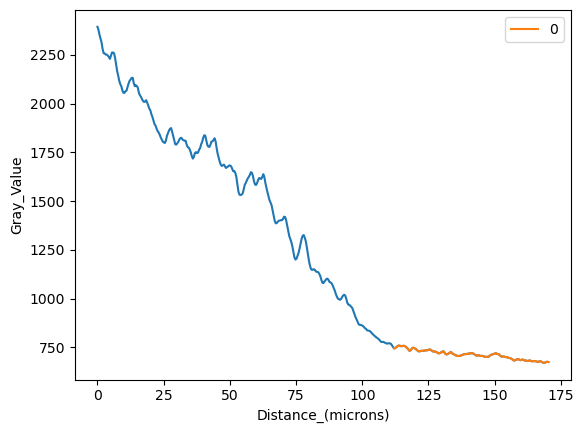

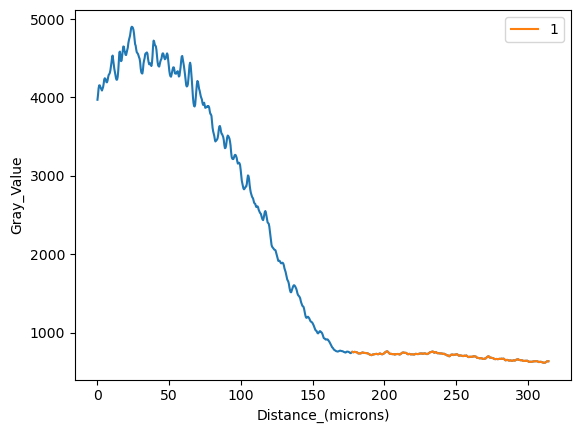

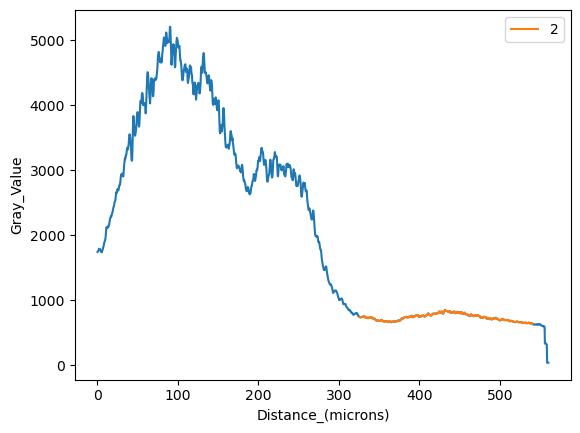

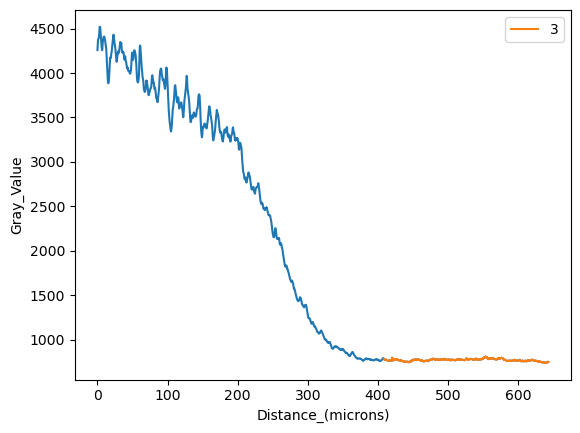

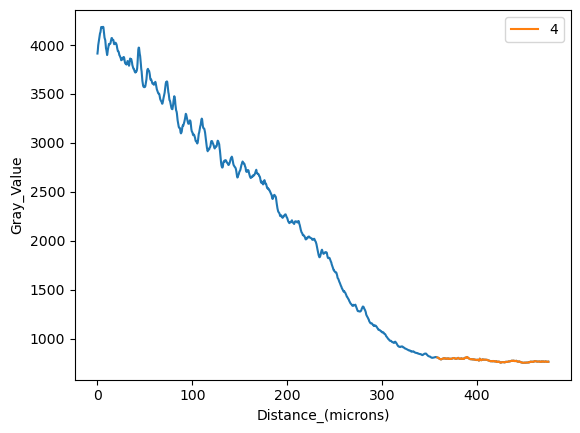

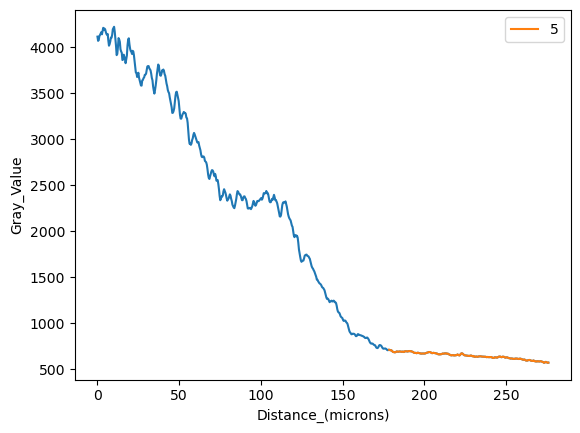

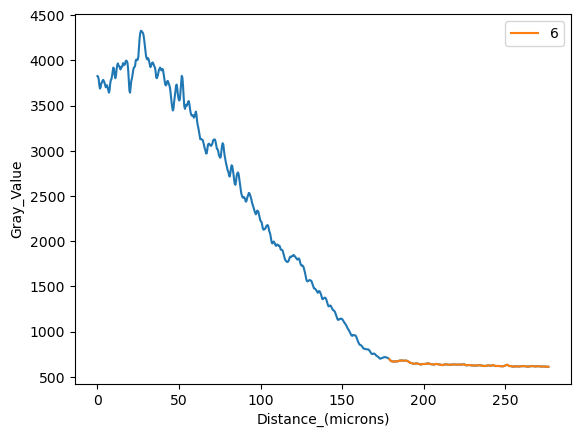

In [68]:
## number of data points to include
#np_all = [150, 350, 600, 600, 600, 300, 400, 250, 250] 
np_all = [150, 350, 600, 600, 300, 250, 250] 

for i, plot_data in enumerate(loaded_data_ctrl):
    
    h, ax = plt.subplots()
    sns.lineplot(data=plot_data, x="Distance_(microns)", y="Gray_Value")
    if i==2:
        sns.lineplot(data=plot_data.iloc[-np_all[i]:-50], x="Distance_(microns)", y="Gray_Value", label=i, ax=ax)
    else:
        sns.lineplot(data=plot_data.iloc[-np_all[i]:], x="Distance_(microns)", y="Gray_Value", label=i, ax=ax)


In [69]:
baseline_intensities = np.zeros(len(loaded_data_ctrl));
for i, plot_data in enumerate(loaded_data_ctrl):
    baseline_intensities[i] = plot_data.iloc[-np_all[i]:]['Gray_Value'].mean()
baseline_intensities

array([713.0617277 , 698.20284581, 718.7315114 , 772.37634979,
       777.88761556, 645.83101978, 634.79640796])

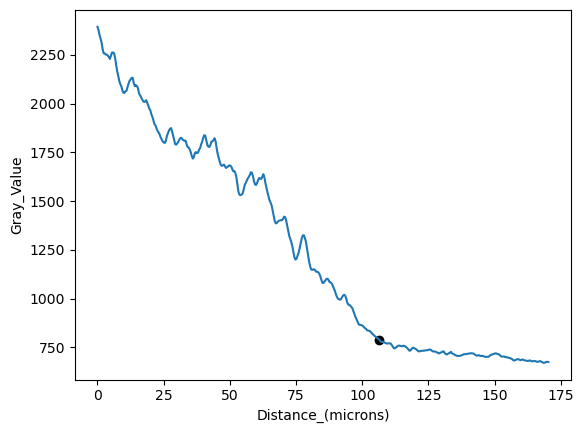

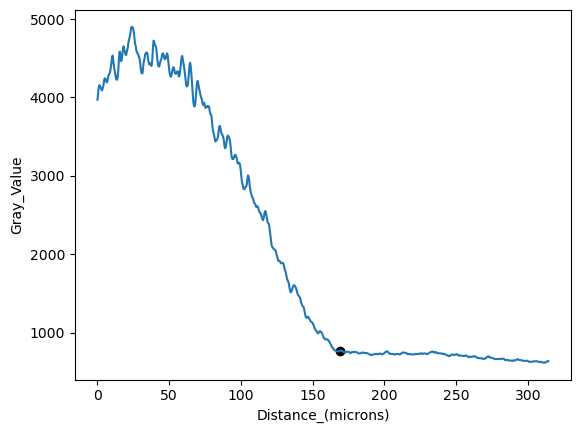

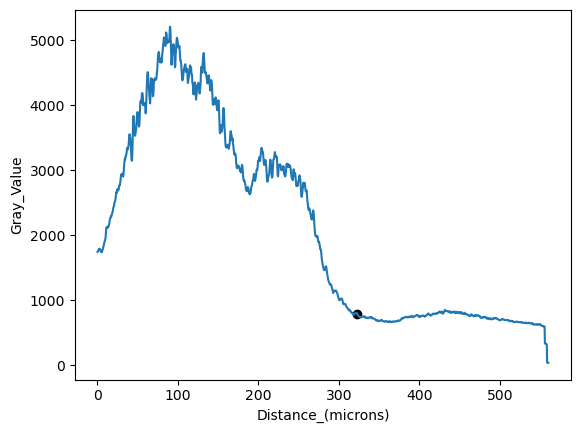

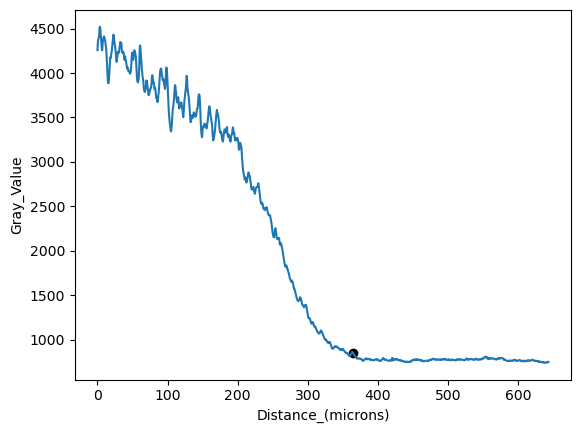

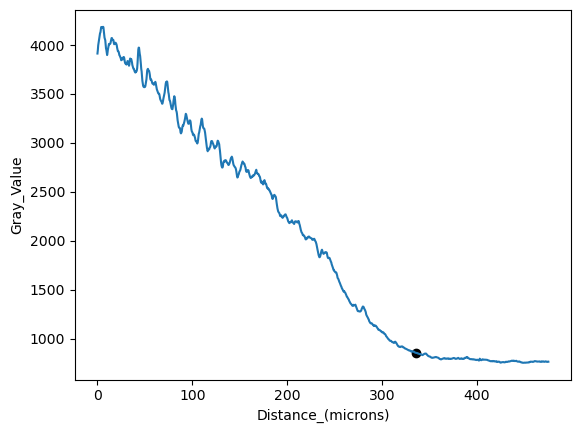

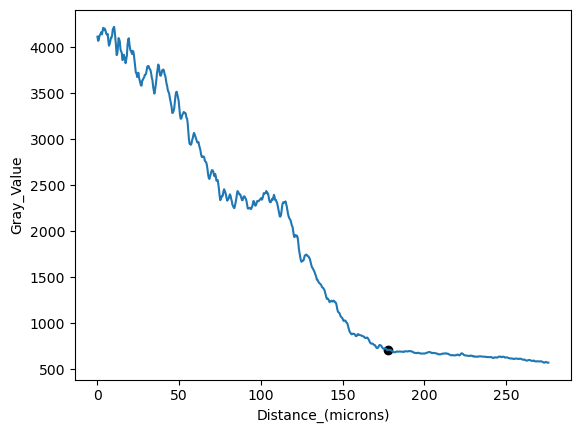

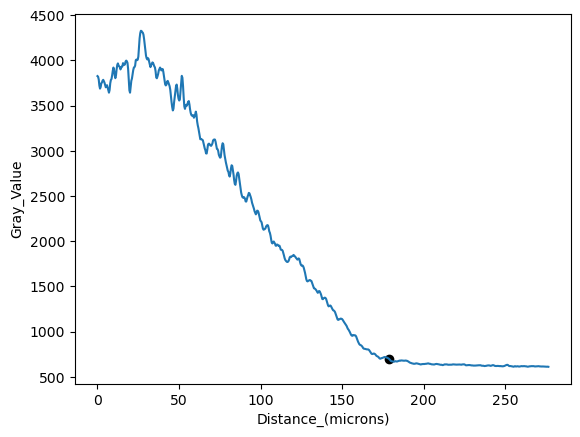

In [70]:
#i_last_threshold_all = np.zeros(len(loaded_data_ctrl));
factor=1.1 ## multiple baseline intensity by factor to get threshold
offset_all = np.zeros(len(loaded_data_ctrl));

# h, ax = plt.subplots()
for i, plot_data in enumerate(loaded_data_ctrl):
    plot_data_trimmed = plot_data.iloc[:-np_all[i]] # trim data to exclude region over which baseline intensity is measured
    idx = np.where((plot_data_trimmed['Gray_Value']>baseline_intensities[i]*factor))[0].max() # find last index where threshold is surpassed
    #i_last_threshold_all[i] = idx

    offset_all[i] = plot_data.iloc[idx]["Distance_(microns)"]
    
    h, ax = plt.subplots()
    sns.lineplot(data=plot_data, x="Distance_(microns)", y="Gray_Value")
    ax.scatter(plot_data.iloc[idx]['Distance_(microns)'], plot_data.iloc[idx]['Gray_Value'], color='k' )


In [71]:
## Difference to manual offsets
#manual_offsets = np.array([220, 320, 620, 750, 500, 700, 480, 340, 360])/old_scale_all/pix_per_micron
#offset_all - manual_offsets

In [72]:
for i in range(len(offset_all)):
    loaded_data_ctrl[i]['Distance2'] = - ((loaded_data_ctrl[i][loaded_data_ctrl[i].columns[0]].values) - offset_all[i])

### BAPN

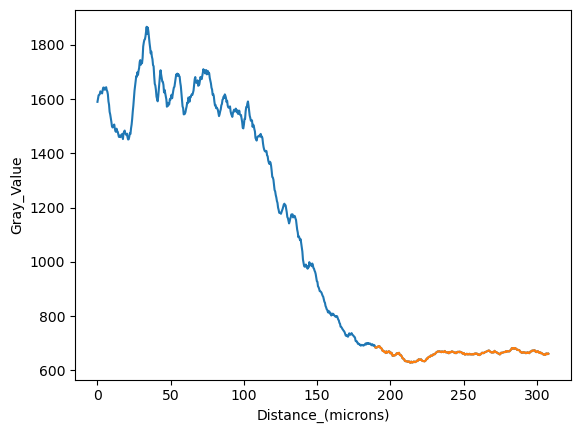

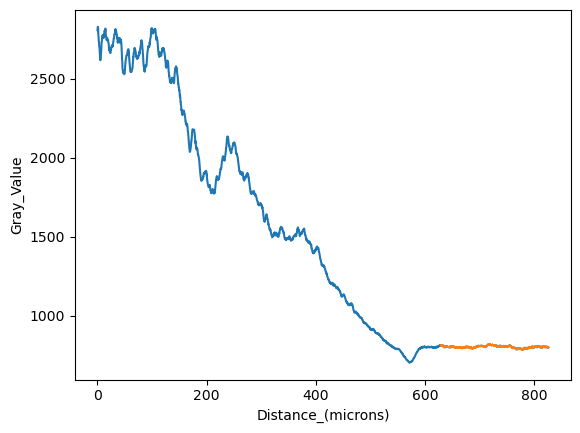

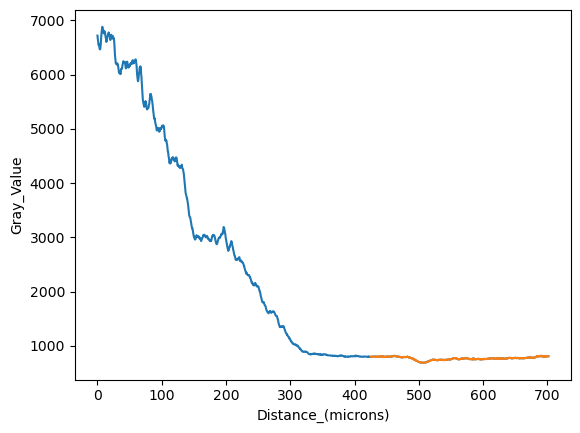

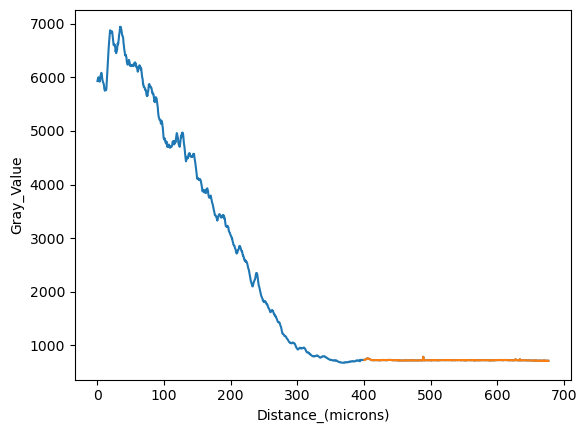

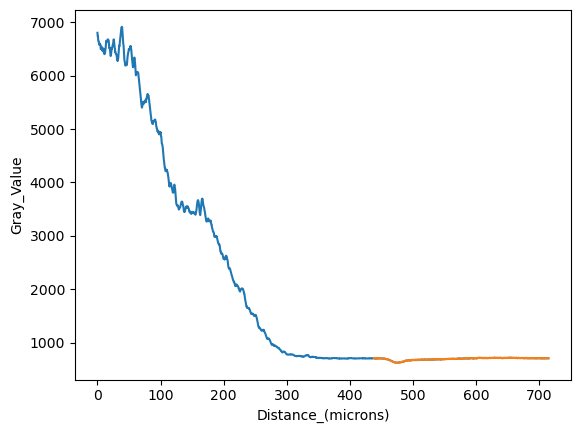

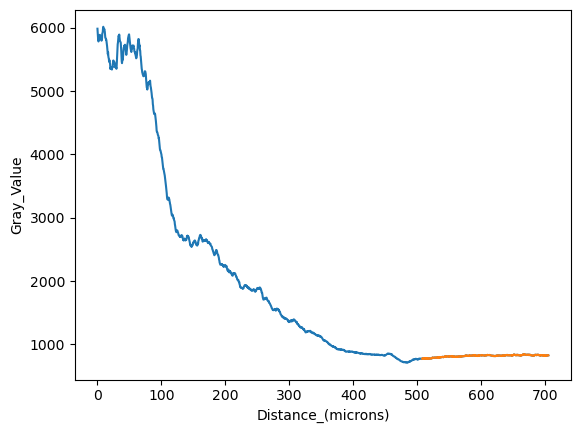

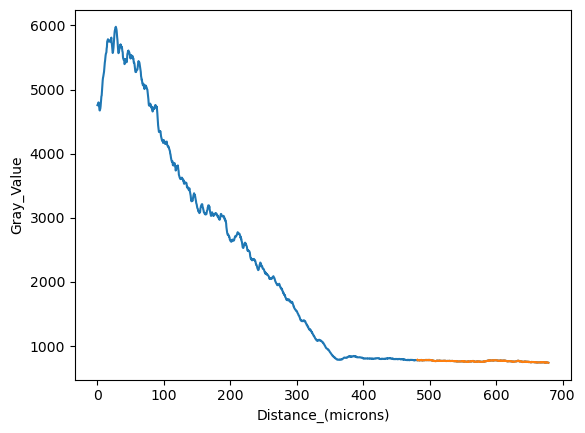

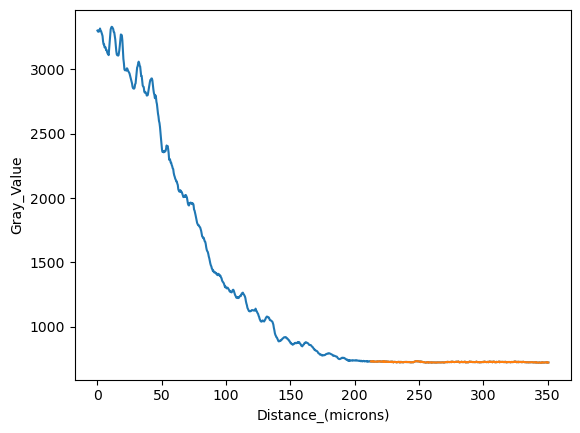

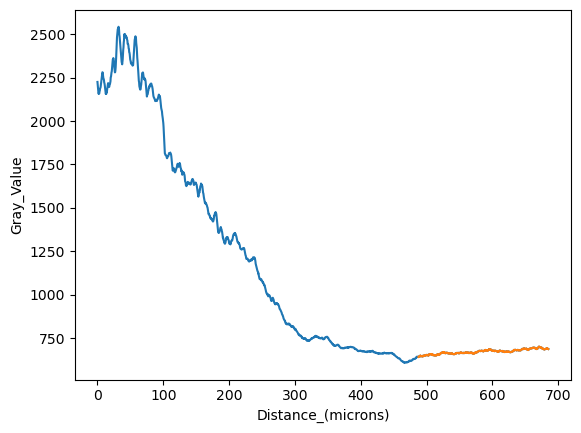

In [55]:
# number of data points to include
np_all = [300, 500, 700, 700, 700, 500, 500, 350, 500] #, 500] 

for i, plot_data in enumerate(loaded_data_bapn):
    h, ax = plt.subplots()
    sns.lineplot(data=plot_data, x="Distance_(microns)", y="Gray_Value")
    sns.lineplot(data=plot_data.iloc[-np_all[i]:], x="Distance_(microns)", y="Gray_Value", ax=ax)


In [56]:
baseline_intensities = np.zeros(len(loaded_data_bapn));
for i, plot_data in enumerate(loaded_data_bapn):
    baseline_intensities[i] = plot_data.iloc[-np_all[i]:]['Gray_Value'].mean()
baseline_intensities

array([661.74438171, 803.38995667, 767.49417681, 721.12334996,
       698.8681475 , 818.072745  , 763.24972803, 724.26455828,
       672.00043335])

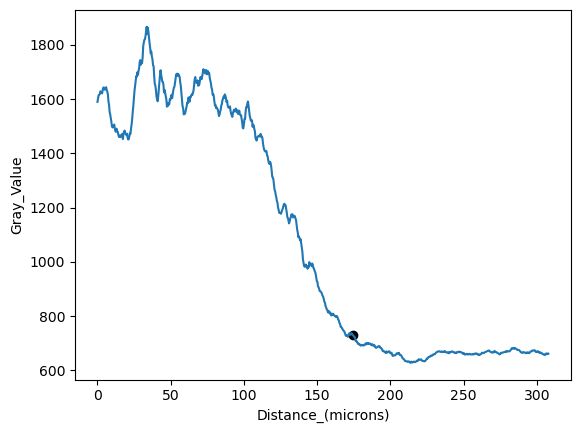

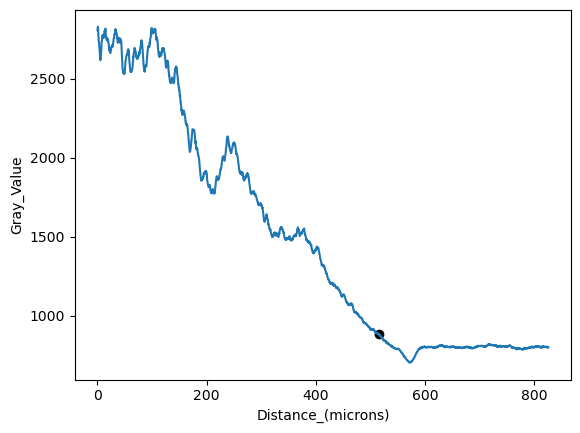

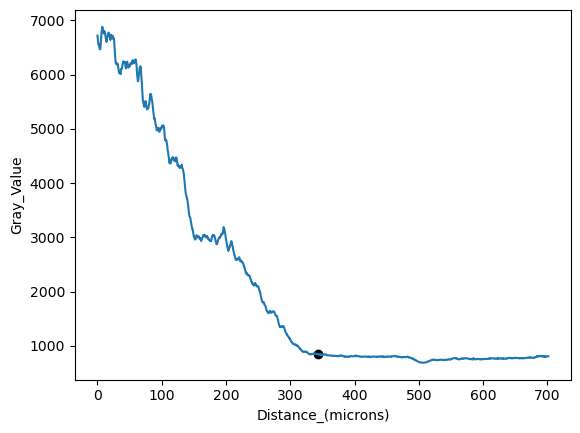

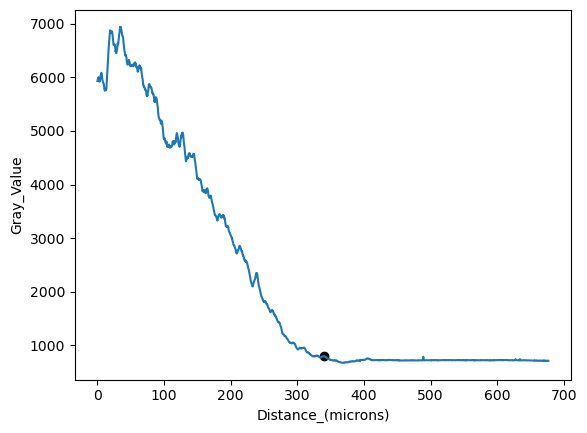

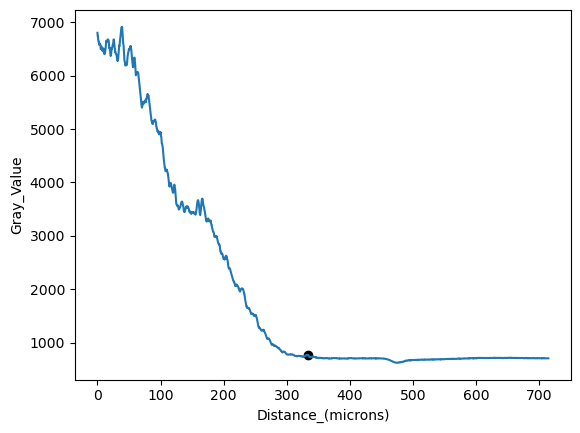

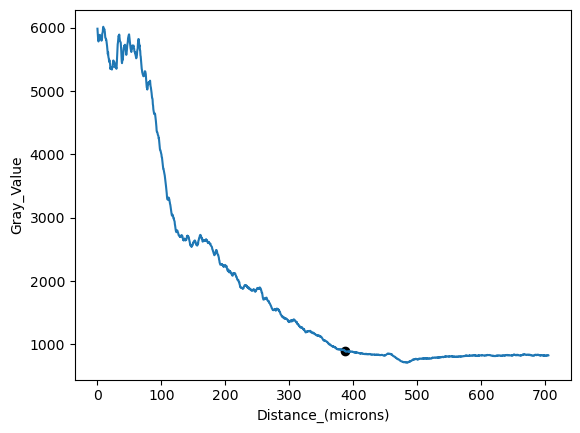

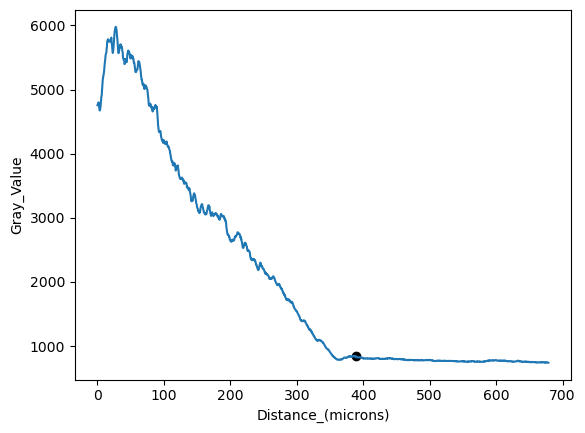

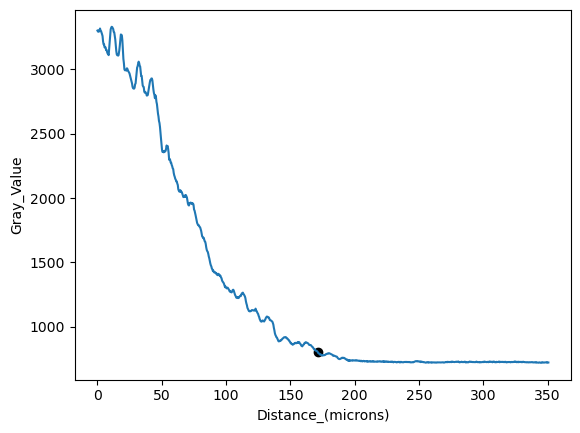

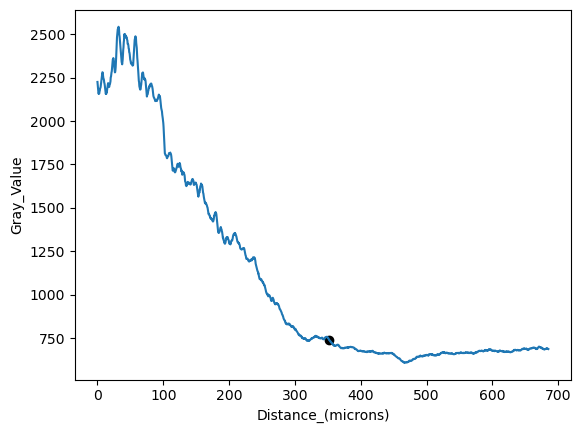

In [57]:
#i_last_threshold_all = np.zeros(len(loaded_data_bapn));
factor=1.1 ## multiple baseline intensity by factor to get threshold
offset_all = np.zeros(len(loaded_data_bapn));

# h, ax = plt.subplots()
for i, plot_data in enumerate(loaded_data_bapn):
    plot_data_trimmed = plot_data.iloc[:-np_all[i]] # trim data to exclude region over which baseline intensity is measured
    idx = np.where((plot_data_trimmed['Gray_Value']>baseline_intensities[i]*factor))[0].max() # find last index where threshold is surpassed
    #i_last_threshold_all[i] = idx

    offset_all[i] = plot_data.iloc[idx]["Distance_(microns)"]
    
    h, ax = plt.subplots()
    sns.lineplot(data=plot_data, x="Distance_(microns)", y="Gray_Value")
    ax.scatter(plot_data.iloc[idx]['Distance_(microns)'], plot_data.iloc[idx]['Gray_Value'], color='k' )


In [66]:
## Difference to manual offsets
# manual_offsets = (np.array([450, 1500, 900, 850, 800, 1150, 950, 500, 830, 430])/pix_per_micron) - 20
# #manual_offsets = (np.array([450, 1500, 900, 850, 800, 1150, 950, 500, 830])/pix_per_micron) - 20
# offset_all - manual_offsets

In [65]:
for i in range(len(offset_all)):
    loaded_data_bapn[i]['Distance2'] = -((loaded_data_bapn[i][loaded_data_bapn[i].columns[0]].values) - offset_all[i])

### Plot results

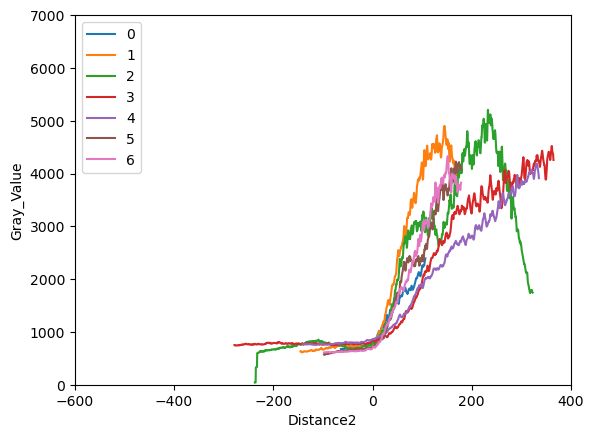

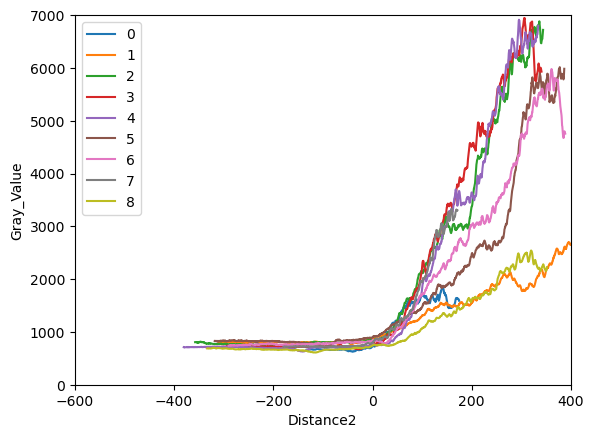

In [73]:
fig, ax = plt.subplots(dpi=100);
for i, plot_data in enumerate(loaded_data_ctrl):
    #print(i)
    #sns.lineplot(data=plot_data, x="Distance_(µm)", y="Gray_Value", ax=ax)
    sns.lineplot(data=plot_data, x="Distance2", y=plot_data.columns[1], ax=ax, label=i)    
plt.xlim([-600, 400])
plt.ylim([0, 7000])
plt.legend()
plt.show()

fig, ax = plt.subplots(dpi=100);
for i, plot_data in enumerate(loaded_data_bapn):
    #print(i)
    #sns.lineplot(data=plot_data, x="Distance_(µm)", y="Gray_Value", ax=ax)
    sns.lineplot(data=plot_data, x="Distance2", y=plot_data.columns[1], ax=ax, label=i)
plt.xlim([-600, 400])
plt.ylim([0, 7000])
plt.legend()   
plt.show()

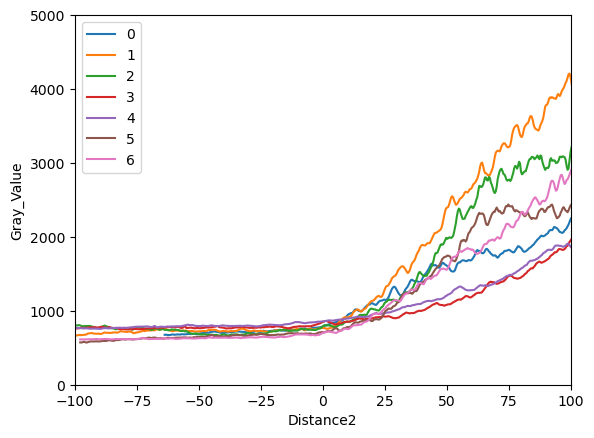

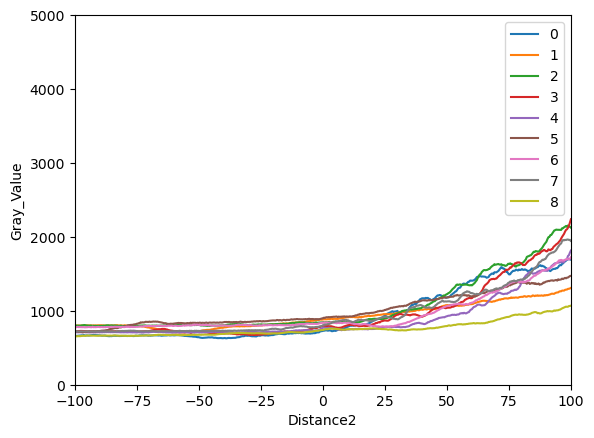

In [74]:
fig, ax = plt.subplots(dpi=100);
for i, plot_data in enumerate(loaded_data_ctrl):
    #print(i)
    #sns.lineplot(data=plot_data, x="Distance_(µm)", y="Gray_Value", ax=ax)
    sns.lineplot(data=plot_data, x="Distance2", y=plot_data.columns[1], ax=ax, label=i)    
plt.xlim([-100, 100])
plt.ylim([0, 5000])
plt.legend()
plt.show()

fig, ax = plt.subplots(dpi=100);
for i, plot_data in enumerate(loaded_data_bapn):
    #print(i)
    #sns.lineplot(data=plot_data, x="Distance_(µm)", y="Gray_Value", ax=ax)
    sns.lineplot(data=plot_data, x="Distance2", y=plot_data.columns[1], ax=ax, label=i)
plt.xlim([-100, 100])
plt.ylim([0, 5000])
plt.legend()   
plt.show()

### Remove elements
Not needed, removed files

In [22]:
## Discard data points
#loaded_data_bapn = loaded_data_bapn[:-1]

In [23]:
# loaded_data_ctrl.pop(6)
# loaded_data_ctrl.pop(4)


,Distance_(microns),Gray_Value,Distance2
0,0.000000,4257.083496,-364.832068
1,0.391451,4319.148438,-364.440617
2,0.782901,4372.237793,-364.049166
3,1.174352,4377.735840,-363.657715
4,1.565803,4387.420410,-363.266265
...,...,...,...
1639,641.587724,744.828308,276.755656
1640,641.979175,748.370789,277.147107
1641,642.370626,752.015686,277.538558
1642,642.762076,753.037476,277.930009


In [24]:
len(loaded_data_ctrl)

7

### Compute slopes

(0.0, 5000.0)

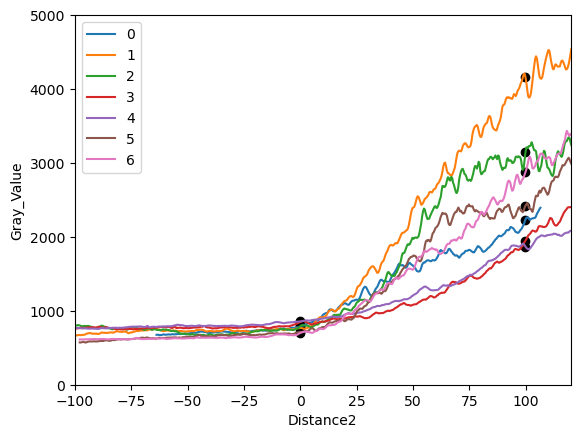

In [78]:
idcs_all_ctrl = np.zeros( [len(loaded_data_ctrl), 2] )

fig, ax = plt.subplots(dpi=100);
for i, plot_data in enumerate(loaded_data_ctrl):
    sns.lineplot(data=plot_data, x="Distance2", y=plot_data.columns[1], ax=ax, label=i)    
    
    idx = np.zeros(2)
    idx[0] = np.where(np.abs(plot_data['Distance2']-100)==np.abs(plot_data['Distance2']-100).min())[0][0]
    idx[1] = np.where(np.abs(plot_data['Distance2'])==np.abs(plot_data['Distance2']).min() )[0][0]

    ax.scatter( plot_data.loc[ idx[0], 'Distance2' ], plot_data.loc[ idx[0], 'Gray_Value' ], color='k' )
    ax.scatter( plot_data.loc[ idx[1], 'Distance2' ], plot_data.loc[ idx[1], 'Gray_Value' ], color='k' ) 

    idcs_all_ctrl[i, :] = idx
    
plt.xlim([-100, 120])
plt.ylim([0, 5000])

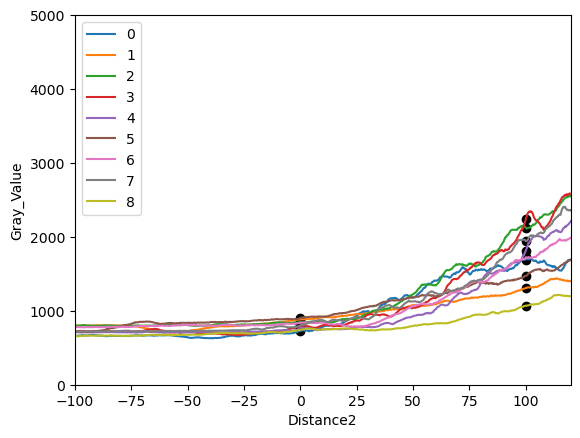

In [80]:
idcs_all_bapn = np.zeros( [len(loaded_data_bapn), 2] )

fig, ax = plt.subplots(dpi=100);
for i, plot_data in enumerate(loaded_data_bapn):
    sns.lineplot(data=plot_data, x="Distance2", y=plot_data.columns[1], ax=ax, label=i)    
    
    idx = np.zeros(2)
    idx[0] = np.where(np.abs(plot_data['Distance2']-100)==np.abs(plot_data['Distance2']-100).min())[0][0]
    idx[1] = np.where(np.abs(plot_data['Distance2'])==np.abs(plot_data['Distance2']).min() )[0][0]

    ax.scatter( plot_data.loc[ idx[0], 'Distance2' ], plot_data.loc[ idx[0], 'Gray_Value' ], color='k' )
    ax.scatter( plot_data.loc[ idx[1], 'Distance2' ], plot_data.loc[ idx[1], 'Gray_Value' ], color='k' ) 

    idcs_all_bapn[i, :] = idx
    
plt.xlim([-100, 120])
plt.ylim([0, 5000])
plt.show()

(0.0, 4500.0)

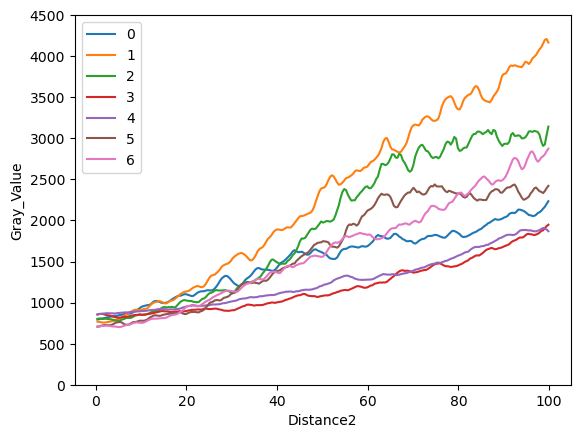

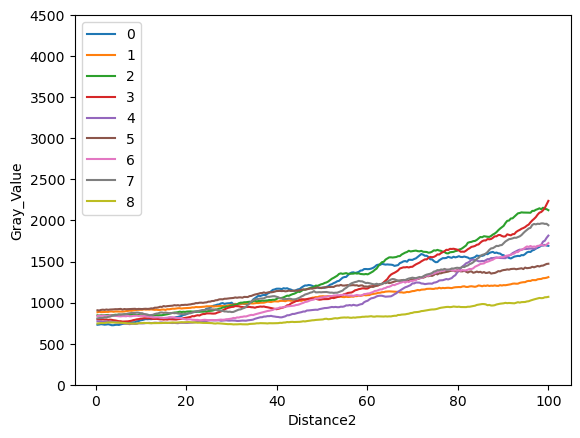

In [87]:
## calculate slopes
slopes_ctrl = np.zeros( len(loaded_data_ctrl) )
fig, ax = plt.subplots(dpi=100)
for i, plot_data in enumerate(loaded_data_ctrl):
    plot_data_trimmed = plot_data.iloc[ int(idcs_all_ctrl[i,0]):int(idcs_all_ctrl[i,1]) ]
    sns.lineplot(data=plot_data_trimmed, x="Distance2", y=plot_data.columns[1], ax=ax, label=i)

    x = plot_data_trimmed['Distance2']
    y = plot_data_trimmed['Gray_Value']
    coef = np.polyfit(x,y,1)

    slopes_ctrl[i] = coef[0]

    x_mesh = np.linspace(0, 100, 20)
    #ax.plot( x_mesh, coef[0]*x_mesh+coef[1], 'k--' )

plt.ylim([0, 4500])
#fig.savefig('Intensities_CTRL_individual_lines.pdf')

slopes_bapn = np.zeros( len(loaded_data_bapn) )
fig, ax = plt.subplots(dpi=100)
for i, plot_data in enumerate(loaded_data_bapn):
    plot_data_trimmed = plot_data.iloc[ int(idcs_all_bapn[i,0]):int(idcs_all_bapn[i,1]) ] 
    sns.lineplot(data=plot_data_trimmed, x="Distance2", y=plot_data.columns[1], ax=ax, label=i)   

    x = plot_data_trimmed['Distance2']
    y = plot_data_trimmed['Gray_Value']
    coef = np.polyfit(x,y,1)

    slopes_bapn[i] = coef[0]

    x_mesh = np.linspace(0, 100, 20)
    #ax.plot( x_mesh, coef[0]*x_mesh+coef[1], 'k--' )

plt.ylim([0, 4500])
#fig.savefig('Intensities_BAPN_individual_lines.pdf')

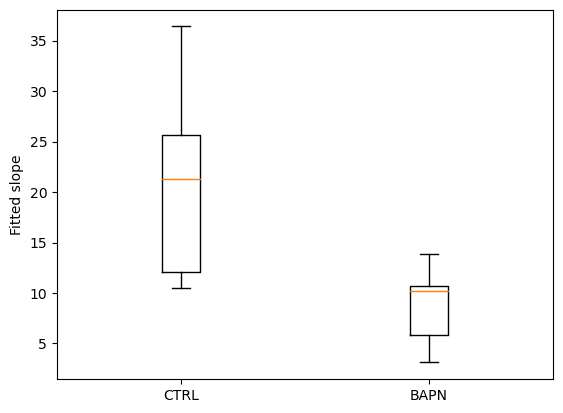

In [88]:
plt.subplots()
plt.boxplot( [slopes_ctrl, slopes_bapn], labels=['CTRL', 'BAPN'] )
plt.ylabel('Fitted slope')
#plt.savefig('Intensity_slopes_CTRL_and_BAPN.pdf')
plt.show()

In [84]:
## Significance test
from scipy.stats import mannwhitneyu 
mannwhitneyu(slopes_ctrl, slopes_bapn)

MannwhitneyuResult(statistic=56.0, pvalue=0.007867132867132868)

In [333]:
#pd.set_option('display.width', 2000)
# pd.set_option('display.expand_frame_repr', True)
for i in range(len(files)):
    print(i, file_ids[i] )

0 #6left_very_thin_profile
1 #3right_ds2_noIP_profile
2 #2right_no_IP_slice_profile
3 #1right_crop2_plot_profile
4 #4right_20220616_135209_profile
5 #1right_crop1_plot_profile
6 #4left_20220616_140140_fused_profile
7 #6right_profile
8 #1left_ds2_plot_profile


Something went wrong with samples 4 and 6 (4right_20220616_135209_profile, 4left_20220616_140140_fused_profile).

In [334]:
#pd.set_option('display.width', 2000)
# pd.set_option('display.expand_frame_repr', True)
for i in range(len(files_bapn)):
    print(i, file_ids_bapn[i] )

0 30x_20220303_#6_right
1 30x_20220303_#1right
2 30x_20220303_#5_right
3 30x_20220111_#8_cut_right
4 30x_20220111_#8_cut_left
5 30x_20220303_#1left_crop
6 30x_20220303_#5_left
7 30x_20220111_#1_cut_left
8 30x_20220303_#6_left
9 30x_20220303_#4_cut_left_8bit


Samples 1 and 5 (30x_20220303_#1right and 30x_20220303_#1left_crop) seem off.

## Manual alignment

In [73]:
## Try to obtain the same origin by eye
## CTRL
plot_data_all_ctrl = loaded_data.copy()
pix_per_micron = 2.55
offset_all=np.array([220, 320, 620, 750, 500, 700, 480, 340, 360])/old_scale_all/pix_per_micron

for i in range(len(offset_all)):
    plot_data_all_ctrl[i]['Distance2'] = (plot_data_all_ctrl[i][plot_data_all_ctrl[i].columns[0]].values) - offset_all[i]

loaded_data = plot_data_all.copy();

In [74]:
## Try to obtain the same origin by eye
## BAPN
plot_data_all_bapn = loaded_data_bapn.copy()
pix_per_micron = 2.53
offset_all=(np.array([450, 1500, 900, 850, 800, 1150, 950, 500, 830, 430])/pix_per_micron) - 20

for i in range(10):
    plot_data_all_bapn[i]['Distance2'] = (plot_data_all_bapn[i][plot_data_all_bapn[i].columns[0]].values) - offset_all[i]

plot_data_all_bapn = plot_data_all.copy();


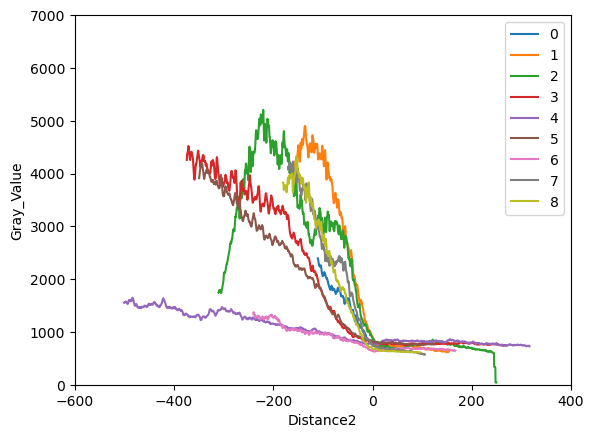

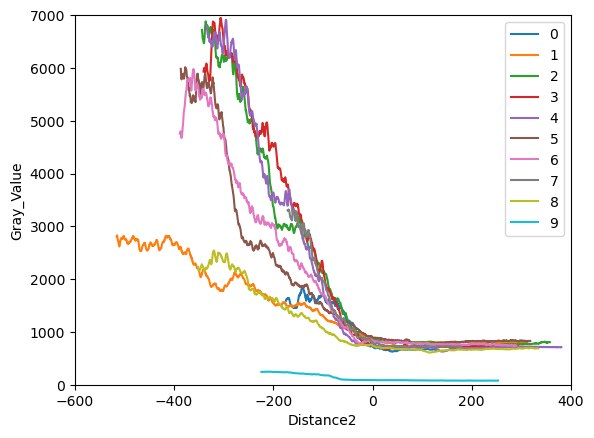

In [277]:
fig, ax = plt.subplots(dpi=100);
for i, plot_data in enumerate(plot_data_all_ctrl):
    #print(i)
    #sns.lineplot(data=plot_data, x="Distance_(µm)", y="Gray_Value", ax=ax)
    sns.lineplot(data=plot_data, x="Distance2", y=plot_data.columns[1], ax=ax, label=i)    
plt.xlim([-600, 400])
plt.ylim([0, 7000])
plt.legend()
plt.show()

fig, ax = plt.subplots(dpi=100);
for i, plot_data in enumerate(plot_data_all_bapn):
    #print(i)
    #sns.lineplot(data=plot_data, x="Distance_(µm)", y="Gray_Value", ax=ax)
    sns.lineplot(data=plot_data, x="Distance2", y=plot_data.columns[1], ax=ax, label=i)
plt.xlim([-600, 400])
plt.ylim([0, 7000])
plt.legend()   
plt.show()

Different steepnesses across different images.

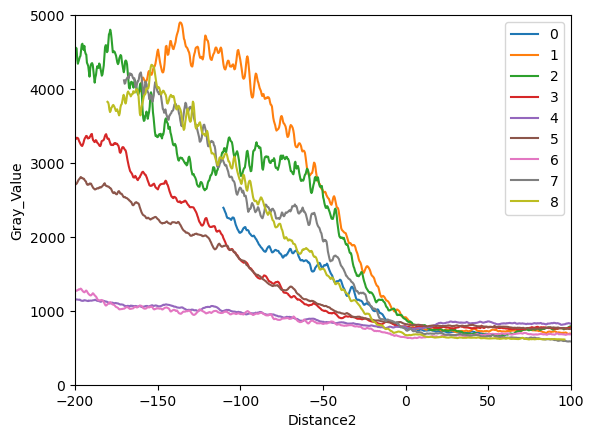

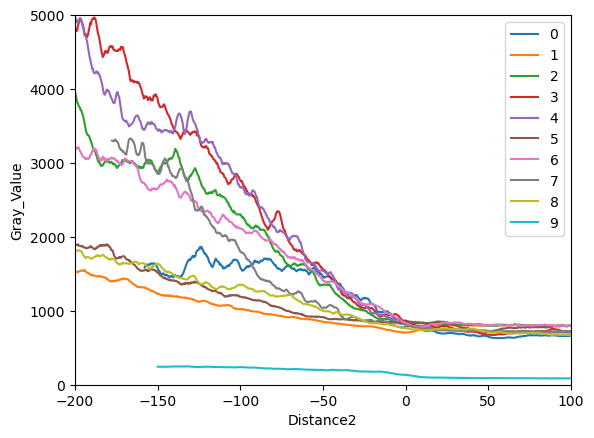

In [81]:
fig, ax = plt.subplots(dpi=100);
for i, plot_data in enumerate(plot_data_all_ctrl):
    #print(i)
    #if ((i!=1) & (i!=2) & (i!=7)):
        #print(i)
    plot_data = plot_data.loc[ (plot_data['Distance2'] > -200) & (plot_data['Distance2'] < 100) ];
    sns.lineplot(data=plot_data, x="Distance2", y=plot_data.columns[1], ax=ax, label=i)    
    
plt.xlim([-200, 100])
plt.ylim([0, 5000])
plt.legend()
plt.show()

fig, ax = plt.subplots(dpi=100);
for i, plot_data in enumerate(plot_data_all_bapn):
    plot_data = plot_data.loc[ (plot_data['Distance2'] > -200) & (plot_data['Distance2'] < 100) ];
    sns.lineplot(data=plot_data, x="Distance2", y=plot_data.columns[1], ax=ax, label=i)
plt.xlim([-200, 100])
plt.ylim([0, 5000])
plt.legend()   
plt.show()

## Plot on a log-log scale

In [187]:
for i, plot_data in enumerate(plot_data_all_ctrl):
    plot_data_all_ctrl[i]['Distance3'] = -plot_data_all_ctrl[i]['Distance2']

for i, plot_data in enumerate(plot_data_all_bapn):
    plot_data_all_bapn[i]['Distance3'] = -plot_data_all_bapn[i]['Distance2']


/var/folders/t4/_pkr1km53qxc6hjp_s8_p7q40000gp/T/ipykernel_8393/2379434789.py:9: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0, 5000])


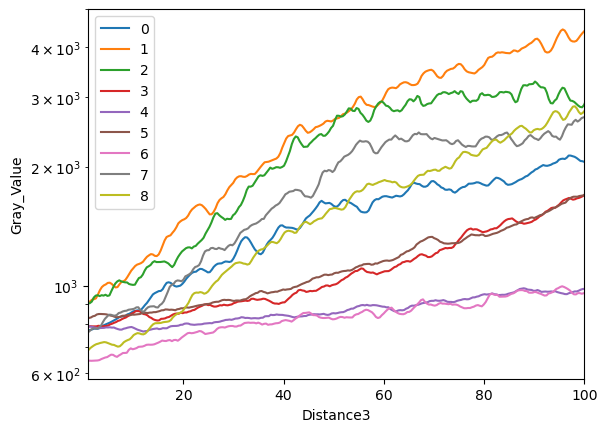

/var/folders/t4/_pkr1km53qxc6hjp_s8_p7q40000gp/T/ipykernel_8393/2379434789.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0, 5000])


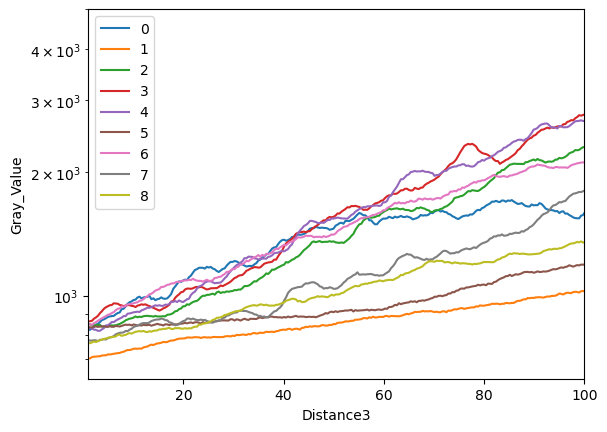

In [188]:
fig, ax = plt.subplots(dpi=100);
#ax.set(xscale="log", yscale="log")
ax.set(yscale="log")
for i, plot_data in enumerate(plot_data_all_ctrl):
    plot_data = plot_data.loc[ (plot_data['Distance3'] >= 1)]
    sns.lineplot(data=plot_data, x="Distance3", y=plot_data.columns[1], ax=ax, label=i)    
plt.xlim([1, 100])
plt.ylim([0, 5000])
plt.legend()
plt.show()

fig, ax = plt.subplots(dpi=100);
#ax.set(xscale="log", yscale="log")
ax.set(yscale="log")
for i, plot_data in enumerate(plot_data_all_bapn):
    if i==9:
        continue
    plot_data = plot_data.loc[ (plot_data['Distance3'] >= 1)]
    sns.lineplot(data=plot_data, x="Distance3", y=plot_data.columns[1], ax=ax, label=i)
plt.xlim([1, 100])
plt.ylim([0, 5000])
plt.legend()   
plt.show()

# Live imaging